In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("candy-data.csv")

In [3]:
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [4]:
data.shape

(85, 13)

In [5]:
data.info

<bound method DataFrame.info of                 competitorname  chocolate  fruity  caramel  peanutyalmondy  \
0                    100 Grand          1       0        1               0   
1                 3 Musketeers          1       0        0               0   
2                     One dime          0       0        0               0   
3                  One quarter          0       0        0               0   
4                    Air Heads          0       1        0               0   
..                         ...        ...     ...      ...             ...   
80                   Twizzlers          0       1        0               0   
81                    Warheads          0       1        0               0   
82        WelchÕs Fruit Snacks          0       1        0               0   
83  WertherÕs Original Caramel          0       0        1               0   
84                    Whoppers          1       0        0               0   

    nougat  crispedricewafer  h

In [7]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [8]:
# Visualizing 

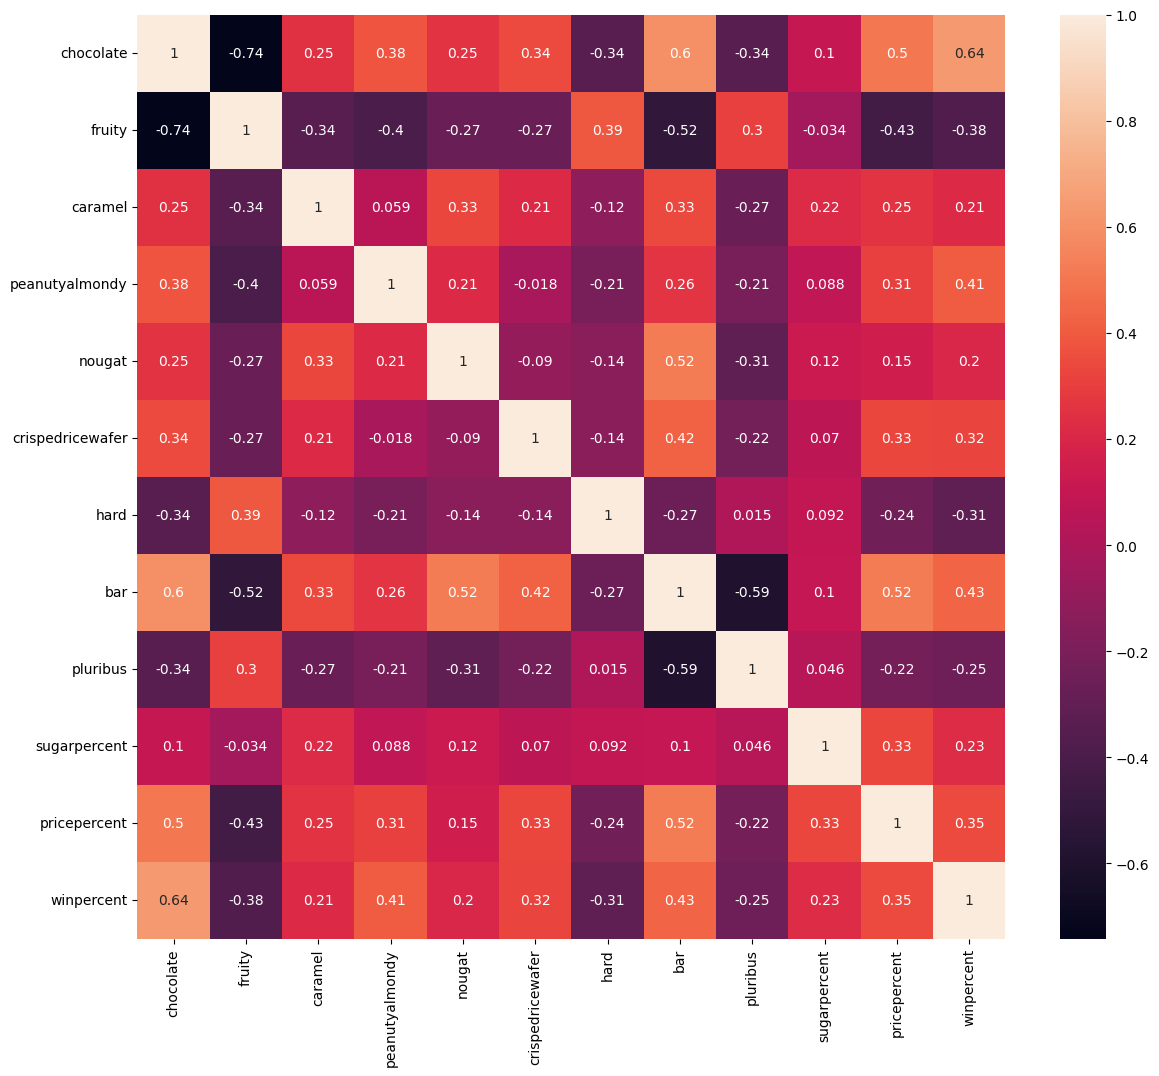

In [12]:
# Select only numeric columns
data_numeric = data.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 12))
sns.heatmap(data_numeric.corr(), annot=True)
plt.show()

In [13]:
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [18]:
# Assuming 'bar' is your target variable, and you want to drop it from X.
y = data['bar']
X = data.drop('bar', axis=1)

# Separate categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Scale numeric columns only
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Now, you need to handle categorical columns, for example, using one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols)

In [19]:
X

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,pluribus,sugarpercent,pricepercent,...,competitorname_Tootsie Roll Juniors,competitorname_Tootsie Roll Midgies,competitorname_Tootsie Roll Snack Bars,competitorname_Trolli Sour Bites,competitorname_Twix,competitorname_Twizzlers,competitorname_Warheads,competitorname_WelchÕs Fruit Snacks,competitorname_WertherÕs Original Caramel,competitorname_Whoppers
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.737973,0.879793,...,False,False,False,False,False,False,False,False,False,False
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.606960,0.518135,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.108808,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.518135,...,False,False,False,False,False,False,False,False,False,False
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.916070,0.518135,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213920,0.108808,...,False,False,False,False,False,True,False,False,False,False
81,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.083930,0.108808,...,False,False,False,False,False,False,True,False,False,False
82,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.309110,0.312953,...,False,False,False,False,False,False,False,True,False,False
83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.179120,0.265285,...,False,False,False,False,False,False,False,False,True,False


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [24]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [25]:
print(f"Model Accuracy: {model.score(X_test, y_test)}")

Model Accuracy: 1.0
